In [1]:
import pandas as pd
import re
import bz2
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from scipy.spatial.distance import cosine
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import FeatureAgglomeration
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import euclidean, cityblock
from sklearn.decomposition import NMF
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm import tqdm

In [2]:
def nearest_k(query, objects, k, dist):
    """Return the indices to objects most similar to query
    
    Parameters
    ----------
    query : ndarray
        query object represented in the same form vector representation as the
        objects
    objects : ndarray
        vector-represented objects in the database; rows correspond to 
        objects, columns correspond to features
    k : int
        number of most similar objects to return
    dist : function
        accepts two ndarrays as parameters then returns their distance
    
    Returns
    -------
    ndarray
        Indices to the most similar objects in the database
    """
    return np.argsort([dist(query, o) for o in objects])[:k]

In [3]:
bills = df_cleaned = pd.read_pickle('../data_cleaning/clusters_added.pkl')

In [4]:
# bills.head()['scope']

In [5]:
tfidf = TfidfVectorizer(token_pattern=r'[a-z]+', stop_words='english', min_df=0.01, max_df=0.99).fit(bills['combined_title'])
X_idf  = tfidf.transform(bills['combined_title']).toarray()
X_feat_names = tfidf.get_feature_names()

In [9]:
nmf = NMF()
X_nmf = nmf.fit_transform(X_idf)
nmf.reconstruction_err_
# reconstruction_err = []
# for k in range(len(X_feat_names)):
#     nmf_1 = NMF(n_components=k+1)
#     nmf_1.fit(X_idf)
#     reconstruction_err.append(nmf_1.reconstruction_err_)

6.56320257129853

In [ ]:
# km = KMeans(n_clusters=3, max_iter=300, tol=1e-4, n_jobs=-1).fit(X_svd)
# y_pred = km.predict(X_svd)
dist = euclidean
# actual = y_pred[j]
# all_labels = y_pred
# length = bills.shape[0]

pres = defaultdict(list)
rec = defaultdict(list)
# for i in tqdm(range(10000, 10050)):
    #     print(i)

for s_i in tqdm(range(1500)):  #first 5 of the data as query one by one
    s = np.random.randint(bills.shape[0])
    nearest = bills.iloc[nearest_k(X_svd[s, :], X_svd, bills.shape[0], dist)]
    r = []
    k = bills.shape[0]
    for j in range(k):
    #         print(j)
        r.append(nearest['scope'].iloc[j] == bills['scope'].iloc[s])
    r = sum(r)
    precision = r/k
    n = sum(bills['scope'] == bills['scope'].iloc[s])
    recall = r/n
    pres[s].append(precision)
    rec[s].append(recall)

In [24]:
np.trapz(pres, rec)

0.0005348121588573262

In [ ]:
km = KMeans(n_clusters=3, max_iter=300, tol=1e-4, n_jobs=-1).fit(X_svd)
y_pred = km.predict(X_svd)
dist = euclidean
# actual = y_pred[j]
all_labels = y_pred
# length = bills.shape[0]

pres = []
rec = []
s = 0

for i in tqdm(range(1, bills.shape[0]+1)):
    print(i)
    nearest = bills.iloc[nearest_k(X_svd[s, :], X_svd, i, dist)]
    r = []
    
    k = i
    for j in range(k):
        r.append(nearest['scope'].iloc[j] == bills['scope'].iloc[s])
    r = sum(r)
    precision = r/k
    n = sum(bills['scope'] == bills['scope'].iloc[s])
    recall = r/n
    pres.append(precision)
    rec.append(recall)

[0.651465125877012,
 0.6515339111294538,
 0.6516026963818957,
 0.6516714816343376,
 0.6517402668867794,
 0.6518090521392214,
 0.6518778373916633,
 0.6519466226441051,
 0.652015407896547,
 0.6520841931489889,
 0.6521529784014307,
 0.6522217636538726,
 0.6522905489063144,
 0.6523593341587564,
 0.6524281194111983,
 0.6524281194111983,
 0.6524969046636401,
 0.652565689916082,
 0.6526344751685239,
 0.6526344751685239,
 0.6527032604209657,
 0.6527720456734076,
 0.6528408309258495,
 0.6529096161782914,
 0.6529784014307333,
 0.6530471866831751,
 0.653115971935617,
 0.6531847571880589,
 0.6532535424405007,
 0.6533223276929426,
 0.6533911129453845,
 0.6534598981978263,
 0.6534598981978263,
 0.6535286834502683,
 0.6535974687027102,
 0.653666253955152,
 0.6537350392075939,
 0.6538038244600358,
 0.6538726097124776,
 0.6539413949649195,
 0.6540101802173613,
 0.6540789654698033,
 0.6541477507222452,
 0.654216535974687,
 0.6542853212271289,
 0.6543541064795708,
 0.6544228917320126,
 0.6544916769844545

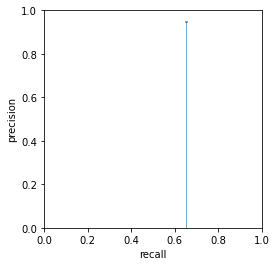

In [35]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.step(rec, pres, where='post')
ax.fill_between(rec, pres, step='post', alpha=0.6)
    
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
    
ax.set_xlabel('recall')
ax.set_ylabel('precision')
np.trapz(pres, rec)
rec